In [1]:
%matplotlib inline
import numpy as np
import pandas as pd


import cython
%load_ext Cython


%load_ext line_profiler
import line_profiler

from Cython.Compiler.Options import directive_defaults

directive_defaults['linetrace'] = True
directive_defaults['binding'] = True

In [2]:
import KF1
import KF2
import KF_Paper
import KF_PaperUni
import KF3
import CKF3
import CKF4
import CKF5
import CKF6
import CKF7
import CKF8
import CKF9
import CKF10
import CKF11
import CKF12
import CKF13
import CKF14
import CKF15
import CKF16
import CKF17
import CKF18
import CKF19
import CKF20
import CKF21
import CKF22
import CKF23

# Kalman filter

Based on Durbin Koopman


For generic state-space systems like (Hamilton's notation):



$$\underset{(p \times 1)}{y_t} = \underset{(p \times m)}{Z_t} \underset{(m \times 1)}{\alpha_t} + \underset{(p \times 1)}{\epsilon_t}, \qquad \epsilon_t \sim N(0,\underset{(p \times p)}{H_t}) $$

$$\underset{(m \times 1)}{\alpha_{t+1}} = \underset{(m \times m)}{T_t} 
\underset{(m \times 1)}{\alpha_{t}} + \underset{(m \times r)}{R_t} \underset{(r \times r)}{\eta_t}, \qquad \eta_t \sim N(0,\underset{(r \times \ r)}{Q_t})$$


$$\alpha_1 \sim N(a_1,\underset{(m \times m)}{P_1})$$

Where

* $p$ is the number of observed variables
* $m$ is the number of latent states
* $r$ is the number of disturbances (?)


# Dummy data for the KF with non time-varying parameters

## Local Level model

$$ y_t = \mu_t + \epsilon_t, \qquad \epsilon \sim NID(0, \sigma^2_ \epsilon) $$
$$ \mu_{t+1} = \mu_t + \eta_t, \qquad \eta_t \sim NID(0,\sigma^2_ \eta) $$

# Dummy data

In [3]:
# PARAMETERS
m = 2
p = 4


Z = [[0.3,0.7],[0.1,0],[0.5,0.5],[0,0.3]]


Z = pd.DataFrame(Z)

H = pd.DataFrame(np.diag([1.0,2.0,3.0,4.0]))


T = pd.DataFrame(np.identity(2))
R = pd.DataFrame(np.identity(2))

Q = pd.DataFrame(np.diag([0.2,0.4]))

# GENERATE DATA

n = 10000 #sample size
mut = [np.array([1,10]).reshape(m,1)]
yt = [np.array([0,0,0,0]).reshape(p,1)]

for i in range(0,1000):
    
    temp = np.multiply(np.random.randn(m,1),np.diag(Q).reshape((m,1)))
    temp = R.dot(temp)
    temp = temp + mut[i]
    mut.append(temp)  
    
    temp = np.multiply(np.random.randn(p,1),np.diag(H).reshape((p,1)))
    yt.append(temp+Z.dot(mut[i+1]))

    
yt[0] = pd.DataFrame(yt[0])   
y = pd.concat(yt,axis=1).T.reset_index(drop=True)
mut[0] = pd.DataFrame(mut[0])
mut = pd.concat(mut,axis=1).T.reset_index(drop=True)

# GENERATE PARTIAL NULL

nny = y.copy()
probNan= 0.50
for i in nny.index:
    ran = np.random.uniform(size=nny.iloc[i].shape)
    nny.iloc[i][ran<probNan] = np.nan
    
    
# GENERATE WHOLE NULL

wny = y.copy()
probNan= 0.50
for i in wny.index:
    ran = np.random.uniform(size=(1))
    if ran < probNan:
        wny.iloc[i] = np.nan


In [4]:
nny.head(2)

,0,1,2,3
0,NaN,NaN,0.000000,0.0
1,NaN,NaN,3.051271,NaN


In [5]:
y = np.array(y)
nny = np.array(nny)
wny = np.array(wny)
Z = np.array(Z)
H = np.array(H)
T = np.array(T)
R = np.array(R)
Q = np.array(Q)

#a1 = (m x 1)
a1 = np.zeros(m)
#P1 = (m x m)
P1 = np.diag(np.ones(m)*1.0)

# Testing the KFs

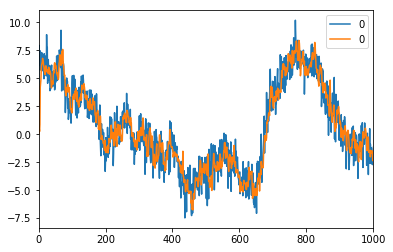

In [6]:
ret = CKF23.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


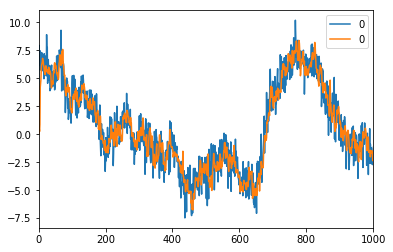

In [7]:
ret = CKF22.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


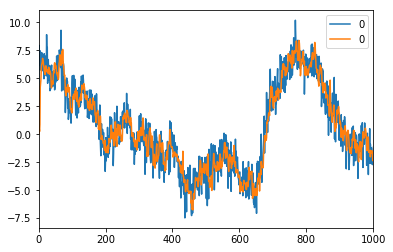

In [8]:
ret = CKF21.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


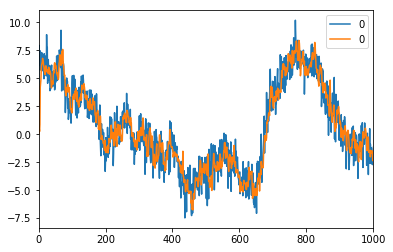

In [9]:
ret = CKF20.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


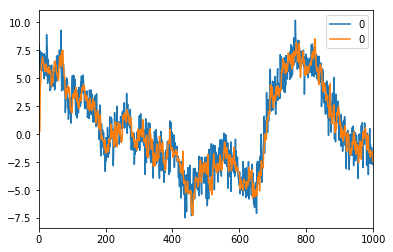

In [10]:
ret = CKF19.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


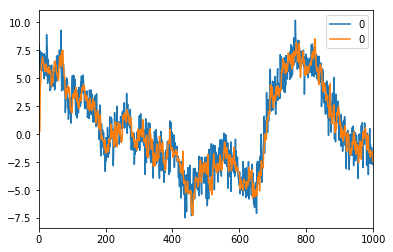

In [11]:
ret = CKF18.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


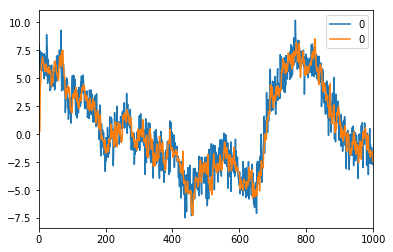

In [12]:
ret = CKF17.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


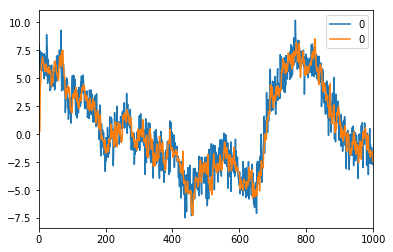

In [13]:
ret = CKF16.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


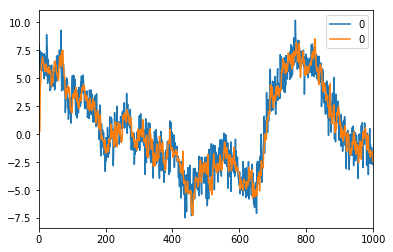

In [14]:
ret = CKF15.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


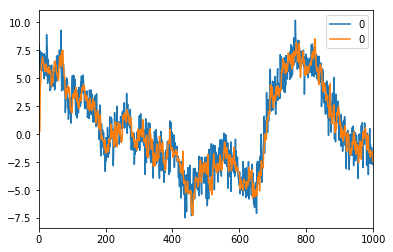

In [15]:
ret = CKF14.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


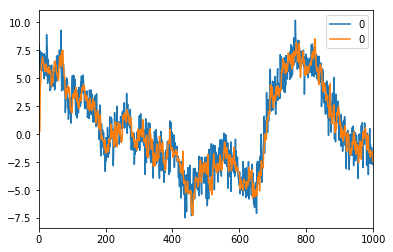

In [16]:
ret = CKF13.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


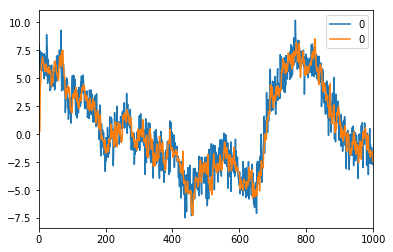

In [17]:
ret = CKF12.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


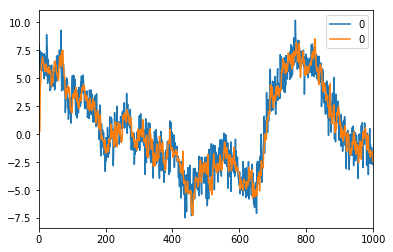

In [18]:
ret = CKF11.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


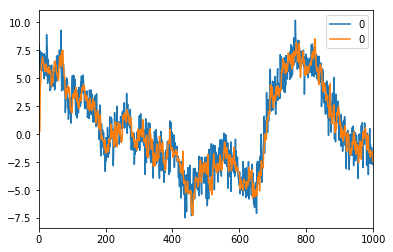

In [19]:
ret = CKF10.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


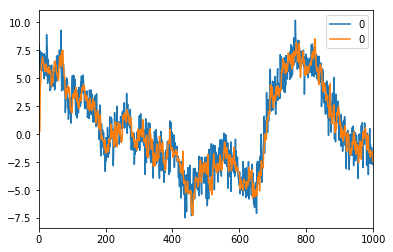

In [20]:
ret = CKF9.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


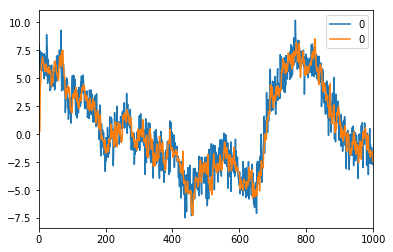

In [21]:
ret = CKF8.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


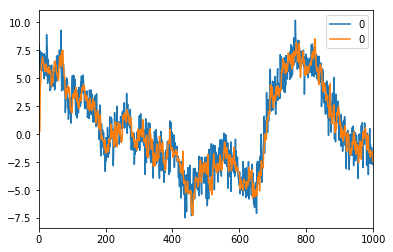

In [22]:
ret = CKF7.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


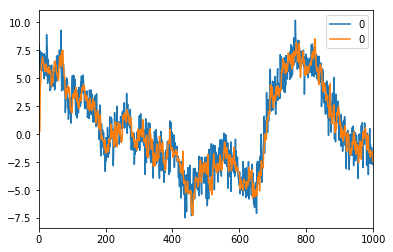

In [23]:
ret = CKF6.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


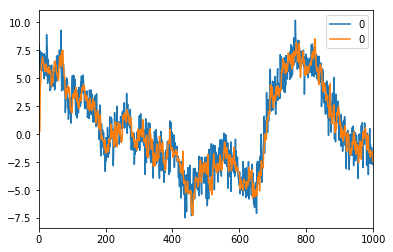

In [24]:
ret = CKF5.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


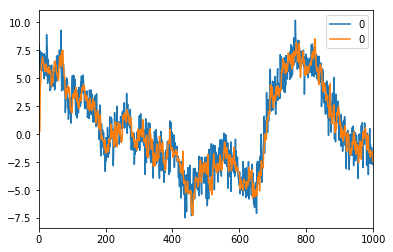

In [25]:
ret = CKF4.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


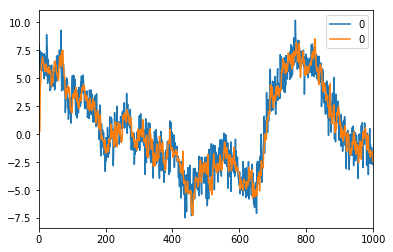

In [26]:
ret = CKF3.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


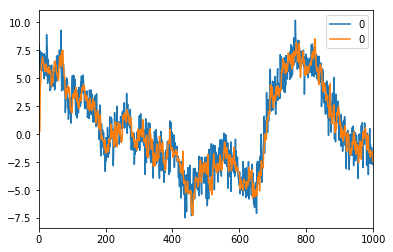

In [27]:
ret = KF3.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


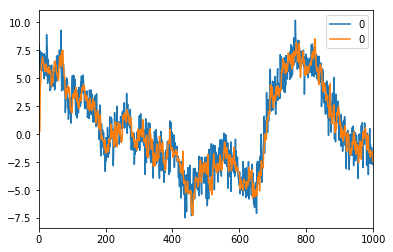

In [28]:
ret = KF2.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


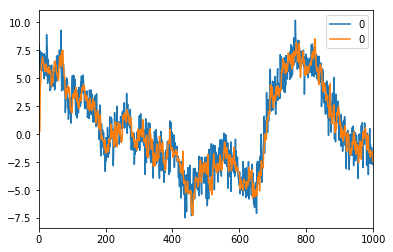

In [29]:
ret = KF1.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


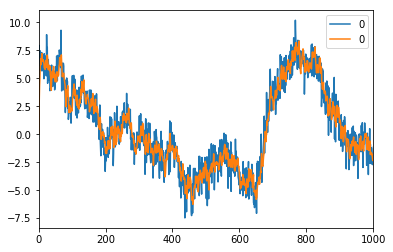

In [30]:
ret = KF_PaperUni.KalmanFilter(
    y = y,
#     y = wny,
#     y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
    nStates = a1.shape[0],
    export=True
)

vy = pd.DataFrame(y)

i = 0

ret = ret['yhat']

pd.concat([vy[i], ret[i]], axis=1).plot()

# Performance

In [31]:
%%timeit

ret = KF_Paper.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
    nStates = a1.shape[0]
)

10 loops, best of 3: 157 ms per loop


In [32]:
%%timeit

ret = KF_PaperUni.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
    nStates = a1.shape[0],
    export=True
)

10 loops, best of 3: 112 ms per loop


In [33]:
%%timeit

ret = KF1.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

10 loops, best of 3: 58.7 ms per loop


In [34]:
%%timeit

ret = KF2.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

10 loops, best of 3: 71.5 ms per loop


In [35]:
%%timeit

ret = KF3.KalmanFilter(
#     y = y,
#     y = wny,
    y = nny,
    Z = Z,
    H = H,
    T = T,
    R = R,
    Q = Q,
    a1 = a1,
    P1 = P1,
)

10 loops, best of 3: 71.5 ms per loop


In [36]:
%%timeit

ret = CKF3.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 68.4 ms per loop


In [37]:
%%timeit

ret = CKF4.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 67.8 ms per loop


In [38]:
%%timeit

ret = CKF5.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 56.1 ms per loop


In [39]:
%%timeit

ret = CKF6.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 58.5 ms per loop


In [40]:
%%timeit

ret = CKF7.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 57.3 ms per loop


In [41]:
%%timeit

ret = CKF8.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 57.6 ms per loop


In [42]:
%%timeit

ret = CKF9.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 56.7 ms per loop


In [43]:
%%timeit

ret = CKF10.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 49.4 ms per loop


In [44]:
%%timeit

ret = CKF11.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 48 ms per loop


In [45]:
%%timeit

ret = CKF12.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 48.3 ms per loop


In [46]:
%%timeit

ret = CKF13.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 44.6 ms per loop


In [47]:
%%timeit

ret = CKF14.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 33.8 ms per loop


In [48]:
%%timeit

ret = CKF15.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 36.8 ms per loop


In [49]:
%%timeit

ret = CKF16.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 36.4 ms per loop


In [50]:
%%timeit

ret = CKF17.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 32 ms per loop


In [51]:
%%timeit

ret = CKF18.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

10 loops, best of 3: 23 ms per loop


In [52]:
%%timeit

ret = CKF19.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

100 loops, best of 3: 17.2 ms per loop


In [53]:
%%timeit

ret = CKF20.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

100 loops, best of 3: 11.5 ms per loop


In [62]:
%%timeit

ret = CKF21.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

100 loops, best of 3: 9.53 ms per loop


In [63]:
%%timeit

ret = CKF22.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

100 loops, best of 3: 9.52 ms per loop


In [64]:
%%timeit

ret = CKF23.KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

100 loops, best of 3: 2.08 ms per loop


## Tests #1 - Dot vs Dgemm

In [89]:
%%cython 
import numpy as np
cimport numpy as np
import pandas as pd
cimport scipy.linalg.cython_blas as blas
import time

# def f(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
#       np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
#       np.ndarray[np.double_t,ndim=2, mode='fortran'] c,
#      ):

cdef f(double[::1,:] a, 
      double[::1,:] b,
       double[::1,:] c,
     ):

    cdef int m, n, k, lda, ldb, ldc
    cdef double alpha, beta

    alpha = 1.0
    beta = 0.0
    lda = 2
    ldb = 2
    ldc = 2
    m = 2
    n = 2
    k = 2

    blas.dgemm('n', #TRANSA
               'n', #TRANSB
               &m, #M
               &n, #N
               &k, #K
               &alpha, #ALPHA
               &a[0,0], #MAtrix A
               &lda, #LDA
               &b[0,0], #MAtrix B
               &ldb, #LDB
               &beta, #BETA
               &c[0,0], #Matrix C
               &ldc) #LDC

#     return c
    return c




#        blas.dgemm('n', #TRANSA
#               'n', #TRANSB
#               <int *> 2, #M
#               <int *> 2, #N
#               <int *> 2, #K
#               <double *> 1, #ALPHA
#               <double *> a_view, #MAtrix A
#               <int *> 2, #LDA
#               <double *> b_view, #MAtrix B
#               <int *> 2, #LDB
#               <double *> 0, #BETA
#               <double *> c_view, #Matrix C
#               <int *> 0) #LDC


cdef multDual(double[::1,:] a, 
      double[::1,:] b,):
    f(a,b,a)
    f(a,b,a)
    return a



def dotMult(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):
    
#     n = 30
#     for i in range(0,1000):
#         for j in range (0,n):
    c = a.dot(b).dot(b)
    return c
            
def fMult(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):
    
#     n = 30
#     for i in range(0,1000):
#         for j in range (0,n):
    f(a,b,a)
    f(a,b,a)
    return a
    
def l(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):

    cdef np.ndarray[np.double_t,ndim=2, mode='fortran'] ac = a.copy(order='F')

#     c = np.empty((2, 2), float, order="F")
    
    timesDot = []
    timesC = []

    n = 30
    
    for i in range(0,10000):
        start_time = time.time()
        for j in range (0,n):
            c = a.dot(b).dot(b)
        end_time = time.time()

        timesDot.append(end_time - start_time)

        ac = a.copy(order='F')
        start_time = time.time()
        for j in range(0,n):
            f(ac,b,ac)
            f(ac,b,ac)
#         time.sleep(1)
        end_time = time.time()
    #     print("--- %s seconds ---" % (end_time - start_time))
        timesC.append(end_time - start_time)

    
#     return np.array(a)
    return {'dot':pd.DataFrame(timesDot), 
            'c' : pd.DataFrame(timesC),
            'final':np.array(ac)
           }



In [22]:
a = np.array(np.random.rand(2,2),float,order='F')
b = np.array(np.random.rand(2,2),float, order='F')
c = np.empty((2,2),float,order='F')

In [23]:
%%timeit

for i in range(0,100):

    a.dot(b).dot(b)

1000 loops, best of 3: 234 µs per loop


In [24]:
%%timeit

for i in range(0,100):

    l(a.copy(order='F'), b.copy(order='F'))

KeyboardInterrupt: 

In [ ]:
# a.dot(b).dot(a).dot(b).dot(b).dot(a).dot(a).dot(b).dot(b).dot(a)
a.dot(b).dot(b)

In [ ]:
ret = l(a.copy(order='F'), b.copy(order='F'))

In [ ]:
ret['final']

In [ ]:
dev = (ret['dot']-ret['c'])

In [ ]:
dev.describe()

# Test #2 - memory view vs ndarray

In [ ]:
%%cython

import numpy as np
cimport numpy as np

def main1(np.ndarray[np.double_t,ndim=2] a,np.ndarray[np.double_t,ndim=2] b):

    cdef np.ndarray[np.double_t,ndim=2] c = np.empty((2,2))

    for i in range(0,1000):
        c = a.dot(b)
    return c

    
def main2(np.ndarray[np.double_t,ndim=2] a,np.ndarray[np.double_t,ndim=2] b):

    cdef double[:,:] c = np.empty((2,2))

    for i in range(0,1000):
        c = a.dot(b)
    return c    
    
# def main2(double[:,:] a,double[:,:] b):

#     cdef double[:,:] c = np.empty((2,2))

#     for i in range(0,100):
#         c = a.dot(b)
#         return c
    

In [ ]:
a = np.array(np.random.rand(2,2),float)
b = np.array(np.random.rand(2,2),float)

In [ ]:
%%timeit 

main1(a,b)

In [ ]:
%%timeit 

main2(a,b)

Next Steps:

separate test 1 in two functions
disable gil, and decorators


# Test #3 - Decorators

In [ ]:
%%cython -a
# %%cython 

import numpy as np
cimport numpy as np
import pandas as pd
cimport scipy.linalg.cython_blas as blas
import time
cimport cython

# def f(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
#       np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
#       np.ndarray[np.double_t,ndim=2, mode='fortran'] c,
#      ):


@cython.boundscheck(False)  
@cython.wraparound(False)
@cython.initializedcheck(False)
@cython.cdivision(True)
@cython.nonecheck(False)
cdef void f(double[::1,:] a, 
      double[::1,:] b,
       double[::1,:] c,
     ) nogil:

    cdef int m, n, k, lda, ldb, ldc
    cdef double alpha, beta

    alpha = 1.0
    beta = 0.0
    lda = 2
    ldb = 2
    ldc = 2
    m = 2
    n = 2
    k = 2

    blas.dgemm('n', #TRANSA
               'n', #TRANSB
               &m, #M
               &n, #N
               &k, #K
               &alpha, #ALPHA
               &a[0,0], #MAtrix A
               &lda, #LDA
               &b[0,0], #MAtrix B
               &ldb, #LDB
               &beta, #BETA
               &c[0,0], #Matrix C
               &ldc) #LDC

#     return c
#     return c




#        blas.dgemm('n', #TRANSA
#               'n', #TRANSB
#               <int *> 2, #M
#               <int *> 2, #N
#               <int *> 2, #K
#               <double *> 1, #ALPHA
#               <double *> a_view, #MAtrix A
#               <int *> 2, #LDA
#               <double *> b_view, #MAtrix B
#               <int *> 2, #LDB
#               <double *> 0, #BETA
#               <double *> c_view, #Matrix C
#               <int *> 0) #LDC



@cython.boundscheck(False)  
@cython.wraparound(False)
@cython.initializedcheck(False)
@cython.cdivision(True)
@cython.nonecheck(False)
def dotMult(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):
    
#     n = 30
    for i in range(0,10000):
#         for j in range (0,n):
        c = a.dot(b).dot(b)
    return c
         
@cython.boundscheck(False)  
@cython.wraparound(False)
@cython.initializedcheck(False)
def fMult(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):
    
#     n = 30
    for i in range(0,10000):
#         for j in range (0,n):
        f(a,b,a)
        f(a,b,a)
    return a
    
def l(np.ndarray[np.double_t,ndim=2, mode='fortran'] a, 
      np.ndarray[np.double_t,ndim=2, mode='fortran'] b,
      ):

    cdef np.ndarray[np.double_t,ndim=2, mode='fortran'] ac = a.copy(order='F')

#     c = np.empty((2, 2), float, order="F")
    
    timesDot = []
    timesC = []

    n = 30
    
    for i in range(0,100000):
        start_time = time.time()
        for j in range (0,n):
            c = a.dot(b).dot(b)
        end_time = time.time()

        timesDot.append(end_time - start_time)

        ac = a.copy(order='F')
        start_time = time.time()
        for j in range(0,n):
            f(ac,b,ac)
            f(ac,b,ac)
#         time.sleep(1)
        end_time = time.time()
    #     print("--- %s seconds ---" % (end_time - start_time))
        timesC.append(end_time - start_time)

    
#     return np.array(a)
    return {'dot':pd.DataFrame(timesDot), 
            'c' : pd.DataFrame(timesC),
            'final':np.array(ac)
           }




In [ ]:
a = np.array(np.random.rand(2,2),float,order='F')
b = np.array(np.random.rand(2,2),float, order='F')
c = np.empty((2,2),float,order='F')

In [ ]:
a.dot(b).dot(b)

In [ ]:
dotMult(a,b)

In [ ]:
fMult(a,b)

In [ ]:
%%timeit

dotMult(a,b)

In [ ]:
%%timeit

fMult(a,b)

# Line Profiler

In [60]:
%%cython -a -f --compile-args=-DCYTHON_TRACE=1

import numpy as np
cimport numpy as np
import pandas as pd
import time
from cpython cimport bool
import line_profiler
cimport cython

from libc.math cimport isnan

ctypedef np.double_t DTYPE_t

##### KF
# Univariate version of durbin and koopman
# Should be the same as CKF22 but with a C-function performing this selection:
#yt[:pt] = y[t,yind]


@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline int getSum(double [:,:] arr,int t, int p) nogil:

    cdef int i
    cdef int s = 0

    for i in range(0,p):
#        print(arr[i])
        if not isnan(arr[t,i]):
             s += 1
    return s


@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline double yZa(double [:] arr1, double [:] arr2 , int m, double y) nogil:

    cdef double res = 0
    cdef int i

    for i in range(0,m):
        res += arr1[i] * arr2[i]
    return y-res


@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline void outerProductP(double [:] arr1, double [:] arr2 , int m, double [:,:] res, double F) nogil:

#    cdef double[:,:] res
    cdef int i
    cdef int j

    for i in range(0,m):
        for j in range(0,m):
            res[i,j] -= arr1[i] * arr1[j] * F
#    return res



@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
cdef inline void PZF(double[:] K, double F, double[:,:] P, double[:] Zti ,
int n, int p, int m) nogil:
#Note n, m and p are the generical matrix sizes from
#https://en.wikipedia.org/wiki/Matrix_multiplication_algorithm

#K[:] = P[:,:].dot(Zt[i]) * (1/F)
#K(m x 1) = P(m x m) * Zt[i](m x 1) * (1/F) (1 x 1)
#Matrix = problem
# n = m
# p = 1
# m = m

    cdef double invF = 1/F
    for i in range(0,n):
        K[i] = 0
        for k in range(0,m):
            K[i] += P[i,k] * Zti[k]
        K[i] *= invF



@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
cdef inline void AKv(double[:] a1, double[:] a0 , double[:] K, double v ,
int m) nogil:

#a[t,i+1,:] = a[t,i,:] + K[:] * v
#AKv(a_mv[t,i+1,:], a_mv[t,i,:], K_mv[:], v, m)

    for i in range(0,m):
        a1[i] = a0[i] + K[i] * v



@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline double ZPZH(double[:] Zt, double[:,:] P, double Ht, int m) nogil:

#F = Zt[i].dot(P[:,:]).dot(Zt[i]) + Ht[i]
#F(1 x 1) = Zt[i] (1 x m) * P (m x m) * Zt[i] (m x 1) + Ht[i] (1 x 1)

    cdef double F = 0
    cdef double temp = 0
    for i in range(0,m):
        temp = 0
        for j in range(0,m):
            temp += Zt[j]*P[j,i]

        F += temp * Zt[i]

    return F + Ht


@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline void TPT(double[:,:] T, double[:,:] P, double[:,:] TT,
double[:,:] RQR, int m, double[:,:] temp) nogil:

# P[:, :] = T.dot(P[:,:]).dot(TT) + RQR
# P(m x m) = T(m x m) P(m x m) TT(m x m) + RQR (m x m)
# Will do 2 matrix multiplications, can be done better, by doing it in a single
#operation


    cdef double tempk2, tempk1

    for i in range(0,m):
        for j in range(0,m):
            tempk1 = 0
            for k1 in range(0,m):
                tempk2 = 0
                for k2 in range(0,m):
                    tempk2 += T[i,k2] * P[k2,k1]
                tempk1 += tempk2 * TT[j,i]
            temp[i,j] = tempk1

    for i in range(0,m):
        for j in range(0,m):
            P[i,j] = temp[i,j] + RQR[i,j]



@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline void Ta(double[:] a1, double[:] a0 , double[:,:] T, int m) nogil:

# a[t+1,0,:] =  T.dot(a[t, pt, :])
#a(m x 1) = T(m x m) * a(m x 1)
    for i in range(0,m):
        a1[i] = 0
        for j in range(0,m):
            a1[i] += T[i,j] * a0[j]



@cython.boundscheck(False)
@cython.wraparound(False)
cdef inline int indexNans(double[:] yt, double[:] yt_orig,double[:,:] Zt, double[:,:] Zt_orig, double[:] H, double[:] H_orig, int p) nogil:
#yt[:pt] = y[t,yind]
#Zt[:pt,:] = Z[yind,:]
#Ht[:pt] = H[yind]
#should do all that and return pt
#yt(p x 1)
#Zt(p x p)

    cdef int i,j
    cdef int pt = 0

    for i in range(0,p):
        if not isnan(yt_orig[i]):
            yt[pt] = yt_orig[i]
            H[pt] = H_orig[i]

            for j in range(0,p):
                Zt[pt,j] = Zt_orig[i,j]

            pt += 1

    return pt




#@cython.initializedcheck(False)
#@cython.nonecheck(False)
@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
def KalmanFilter(
        np.ndarray[DTYPE_t, ndim=2] y,
        np.ndarray[DTYPE_t, ndim=2] Z,
        np.ndarray[DTYPE_t, ndim=2] Hsq,
        np.ndarray[DTYPE_t, ndim=2] T,
        np.ndarray[DTYPE_t, ndim=2] Q,
        np.ndarray[DTYPE_t, ndim=1] a1,
        np.ndarray[DTYPE_t, ndim=2] P1,
        np.ndarray[DTYPE_t, ndim=2] R
   ) :

    # p = number of variables in Yt
    # y should be (n x p)

    cdef int n,p,m,t,i,pt

    n = y.shape[0]
    p = y.shape[1]
    m = a1.shape[0] #number of states


    cdef np.ndarray[DTYPE_t,ndim=3] a = np.empty((n+1,p+1,m))
    a[0,0,:] = a1

    cdef np.ndarray[DTYPE_t,ndim=2] P = np.empty((m, m))
    P[:,:] = P1

    cdef np.ndarray[DTYPE_t,ndim=2] mmTemp = np.empty((m, m))

    cdef np.ndarray[DTYPE_t,ndim=1] K = np.empty((m))

    cdef double v,F


    # RQR = np.linalg.multi_dot([R, Q, R.T])
    cdef np.ndarray[DTYPE_t,ndim=2] RQR = R.dot(Q).dot(R.T)

    cdef np.ndarray[DTYPE_t,ndim=2] TT = T.T

    yhat = np.empty((n,p)) #Later I should use it to export in numpy not pandas


    cdef np.ndarray[DTYPE_t,ndim=1] yt = np.empty(p)
    cdef np.ndarray[DTYPE_t,ndim=1] yInd = np.empty(p)
    cdef np.ndarray[DTYPE_t,ndim=2] Zt = np.empty((p, m))
    cdef np.ndarray[DTYPE_t,ndim=1] Ht = np.empty(p)


    cdef np.ndarray[DTYPE_t,ndim=1] H = np.diag(Hsq) #ONLY WORKS FOR DIAGONAL H

#    cdef np.ndarray[DTYPE_t,ndim=2] y_orig = y.copy()
    cdef np.ndarray[DTYPE_t,ndim=2] Z_orig = Z.copy()
    cdef np.ndarray[DTYPE_t,ndim=1] H_orig = H.copy()


    cdef double[:,:] y_mv = y
#    cdef double[:,:] y_orig_mv = y_orig
    cdef double[:,:] Z_orig_mv = Z_orig
    cdef double[:] H_orig_mv = H_orig
    cdef double[:] yt_mv = yt
    cdef double[:] yInd_mv = yInd
    cdef double[:,:,:] a_mv = a
    cdef double[:,:] Zt_mv = Zt
    cdef double[:] K_mv = K
    cdef double[:,:] P_mv = P
    cdef double[:] Ht_mv = Ht
    cdef double[:,:] T_mv = T
    cdef double[:,:] TT_mv = TT
    cdef double[:,:] RQR_mv = RQR
    cdef double[:,:] mmTemp_mv = mmTemp


    for t in range(0, n):


#        pt = getSum(y_mv, t, p)
#
#        yt[:pt] = y[t,yind]
#        Zt[:pt,:] = Z[yind,:]
#        Ht[:pt] = H[yind] #ONLY WORKS FOR DIAGONAL H

        pt = indexNans(yt_mv, y_mv[t,:],Zt_mv[:,:], Z_orig_mv[:,:],Ht_mv[:],H_orig_mv[:], p)


        for i in range(0, pt):

#            v = yt[i] - np.dot(Zt[i], a[t,i,:])
#            v = yt_mv[i] - innerProduct(Zt_mv[i],a_mv[t,i,:],m)
            v =  yZa(Zt_mv[i],a_mv[t,i,:],m, yt_mv[i])

            # F[t,i] = np.linalg.multi_dot([Z[i], P[t, i,:,:], Z[i]]) + H[i, i]
#            F = Zt[i].dot(P[:,:]).dot(Zt[i]) + Ht[i]
            F = ZPZH(Zt_mv[i], P_mv[:,:], Ht_mv[i], m)

#            K[:] = P[:,:].dot(Zt[i]) * (1/F)
            PZF(K_mv[:], F, P_mv[:,:], Zt_mv[i] , m, 1, m)

#            a[t,i+1,:] = a[t,i,:] + K[:] * v
            AKv(a_mv[t,i+1,:], a_mv[t,i,:], K_mv[:], v, m)

#            P[:,:] += - np.outer(K * F, K)
#            P[:,:] += - np.dot(K[:,None] * F, K[None,:])
            outerProductP(K_mv,K_mv,m,P_mv, F)


#        a[t+1,0,:] =  T.dot(a[t, pt, :])
        Ta(a_mv[t+1,0,:], a_mv[t, pt, :], T_mv, m)

        # P[t+1, 0,:,:] = np.linalg.multi_dot([T, P[t, i + 1,:,:], TT]) + RQR
#        P[:, :] = T.dot(P[:,:]).dot(TT) + RQR
        TPT(T_mv, P_mv, TT_mv, RQR_mv, m, mmTemp_mv)

        # times.append(temp1 == temp2)


    alpha = a[:n, 0,:]
    yhat = pd.DataFrame(np.dot(Z, alpha.T).T)

    # pd.DataFrame(times).to_pickle("Mult")
    # pd.DataFrame(times).to_pickle("Dot")
    return yhat




In [61]:
profile = line_profiler.LineProfiler(KalmanFilter)
profile.runcall(KalmanFilter, nny,Z,H,T,Q,a1,P1, R)
profile.print_stats()

Timer unit: 4.10257e-07 s

Total time: 0.0114478 s
File: C:\Users\pedro.mattos\.ipython\cython\_cython_magic_888ec2f9917be491fe1929a931d75872.pyx
Function: KalmanFilter at line 193

Line #      Hits         Time  Per Hit   % Time  Line Contents
   193                                           def KalmanFilter(
   194                                                   np.ndarray[DTYPE_t, ndim=2] y,
   195                                                   np.ndarray[DTYPE_t, ndim=2] Z,
   196                                                   np.ndarray[DTYPE_t, ndim=2] Hsq,
   197                                                   np.ndarray[DTYPE_t, ndim=2] T,
   198                                                   np.ndarray[DTYPE_t, ndim=2] Q,
   199                                                   np.ndarray[DTYPE_t, ndim=1] a1,
   200                                                   np.ndarray[DTYPE_t, ndim=2] P1,
   201                                                   np.ndarray[

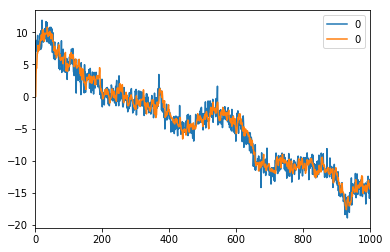

In [49]:
ret = KalmanFilter(nny,Z,H,T,Q,a1,P1, R)

vy = pd.DataFrame(y)

i = 0

pd.concat([vy[i], ret[i]], axis=1).plot()


In [21]:
%%cython 

import numpy as np
cimport numpy as np


# cdef void func(double* letsee):
#     for i in range(0,4):
# #         if not isnan(letsee[i]):
#             print(letsee[i])
#             print(isnan(letsee[i]))

def main1():
#     cdef np.ndarray[np.double_t,ndim=2] a = np.array([[1,np.nan,3,4],[1,np.nan,3,4]])

    n = 10
    cdef np.ndarray[np.double_t,ndim=2] a = np.random.randn(n,n)
    
    cdef np.ndarray[np.double_t,ndim=2] b
    
    cdef double[:,:] a_mv = a
    
    ind = np.ones(n)
    ind[3] = np.nan
    ind[5] = np.nan
    ind[7] = np.nan
    
    
    print(np.array(a_mv))
    print("Hey")
    print(np.array(a_mv[5,(1,3)]))
    
    
#     cdef int[:] intInd = np.array([0,1,2,4,6,8,9])
    
#     for i in range(0,100):
#         b = a[5,ind]
        
    
    
#     return b

# def main2():
# #     cdef np.ndarray[np.double_t,ndim=2] a = np.array([[1,np.nan,3,4],[1,np.nan,3,4]])

#     n = 10
#     cdef np.ndarray[np.double_t,ndim=2] a = np.random.randn(n,n)
    
#     cdef np.ndarray[np.double_t,ndim=2] b
    
#     cdef double[:,:] a_mv = a
    
#     ind = np.ones(n)
#     ind[3] = np.nan
#     ind[5] = np.nan
#     ind[7] = np.nan
    
#     cdef int[:] intInd = np.array([0,1,2,4,6,8,9])
    
#     for i in range(0,100):
#         b = a_mv[5,intInd]
        
    
    
#     return b


Error compiling Cython file:
------------------------------------------------------------
...
    ind[7] = np.nan
    
    
    print(np.array(a_mv))
    print("Hey")
    print(np.array(a_mv[5,(1,3)]))
                          ^
------------------------------------------------------------

C:\Users\pedro.mattos\.ipython\cython\_cython_magic_d4edcb449a25e5b2b2ff755619f47345.pyx:30:27: Invalid index for memoryview specified, type (long, long)


In [22]:
main1()

[[ -1.84431886e+00  -9.49497522e-01  -7.55204358e-01   7.92296013e-01
   -5.15220323e-01   4.92967769e-01  -1.11959677e+00   1.41282936e+00
   -9.76997252e-01  -3.07523775e-03]
 [ -5.72512918e-04   1.28375068e-01  -9.83328445e-01  -5.15255056e-02
   -5.76590036e-01  -3.93038133e-01  -2.97628022e-01  -3.92679588e-01
    1.70319534e+00  -7.98156104e-01]
 [  2.18638200e+00  -1.10903644e+00  -4.81215832e-01   2.01569269e-01
   -2.36572048e-01  -9.97433216e-01   3.96916600e-02   7.03860415e-01
    1.88488261e+00   4.71672265e-01]
 [ -2.49285286e-01  -1.86256254e-01   1.47389354e-01  -3.58631319e-01
    4.25614390e-01  -8.57931459e-01   8.23768918e-01  -5.35666956e-01
    1.87071207e+00  -9.63486884e-02]
 [ -1.43249714e+00   1.75738725e-01  -4.13322319e-01  -2.08350033e-01
    1.49490756e+00   1.75408148e+00   4.51537992e-01  -3.33391870e-02
    5.16260346e-02   2.36054914e-01]
 [ -1.16075661e+00   1.57308621e+00   1.95394366e-01   1.76965992e-01
   -1.18967781e-01   2.54973940e-01   9.39800

In [6]:
a = np.empty(2)
a[:] = np.array([1,2,3])

ValueError: could not broadcast input array from shape (3) into shape (2)

In [26]:
x = np.random.randn(5,5)
x

array([[-0.56313056, -1.27834803, -0.30052179, -2.00063006, -2.05059544],
       [-0.44563071, -0.63580159, -0.67538499, -0.9192516 ,  0.49663121],
       [ 2.11943794, -0.51746142, -0.80092609, -0.89391932,  1.91359607],
       [ 0.52593344, -0.59931707,  0.78093441, -1.62449658, -1.65887717],
       [-0.46422764,  0.96595406, -0.47142008, -0.28886925, -1.86674776]])

In [27]:
x[2,[1,2]]

array([-0.51746142, -0.80092609])

In [76]:
%%cython 
cimport cython
import numpy as np
cimport numpy as np
from libc.math cimport isnan



def main(np.ndarray[double,ndim=1] a, int n):
    cdef double[:] a_mv = a
    for i in range(0,n):
        print(a_mv[i])
        if isnan(a_mv[i]):
            print("pa")

# @cython.cdivision(True)
# @cython.boundscheck(False)
# @cython.wraparound(False)
# def main2(np.ndarray[double,ndim=2] a,np.ndarray[double,ndim=2] b, int n):
    
#     cdef double[:,:] a_mv = a
#     cdef double[:,:] b_mv = b
#     cdef double res = 0
    
#     for i in range(0,n):
#         res += np.dot(a_mv[5,:],b_mv[5,:])

#     return res
        

In [67]:
a = np.random.randn(10,)
b = np.random.randn(10,10)
n = 1000

In [77]:
a = np.array([1,np.nan,3,4,5],dtype=np.float64)
n = 5
main(a,n)

1.0
nan
pa
3.0
4.0
5.0


In [68]:
main1(a,b,n)

71.21341577764414

In [69]:
main2(a,b,n)

71.21341577764414

In [70]:
%timeit main1(a,b,n)
%timeit main2(a,b,n)

100 loops, best of 3: 2.68 ms per loop
100 loops, best of 3: 2.57 ms per loop


In [52]:
x = np.array([1,2,3,9,20])
y = np.array([7,8,9,13,133])




In [53]:
res = np.outer(x,y)
res

array([[   7,    8,    9,   13,  133],
       [  14,   16,   18,   26,  266],
       [  21,   24,   27,   39,  399],
       [  63,   72,   81,  117, 1197],
       [ 140,  160,  180,  260, 2660]])

In [54]:
i = 4
j = 2
res[i,j]

180

In [55]:
x[i]*y[j]

180